In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("../")

import os
import numpy as np
from PIL import Image
from tqdm import tqdm
from matplotlib import pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

from src.config import PROCESSED_DHF1K_PATH, DHF1K_PATH
from src.utils.file import get_paths_recursive

In [ ]:
ground_truth_file_paths = get_paths_recursive(
    folder_path=PROCESSED_DHF1K_PATH,
    match_pattern="ground_truth_*.jpg",
    path_type="f",
    recursive=True,
)

13211

In [4]:
center_bias = None
for ground_truth_file_path in tqdm(ground_truth_file_paths, desc="⌛ Computing center bias..."):
    ground_truth = np.array(Image.open(ground_truth_file_path).convert("F")) / 255.0
    if center_bias is None:
        center_bias = ground_truth
    else:
        center_bias += ground_truth

center_bias /= len(ground_truth_file_paths)

⌛ Computing center bias...: 100%|██████████| 13211/13211 [00:11<00:00, 1101.50it/s]


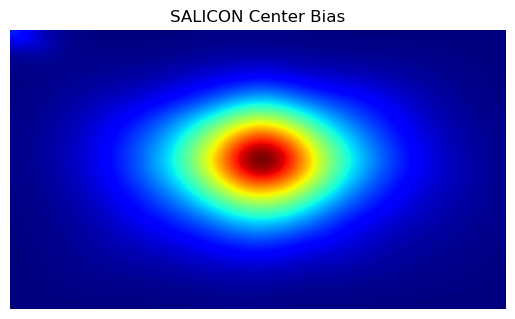

In [5]:
plt.imshow(center_bias, cmap="jet")
plt.axis("off")
plt.title("SALICON Center Bias")
plt.show()

In [6]:
plt.imsave(f"{DHF1K_PATH}/center_bias.jpg", center_bias, cmap="gray")
plt.close()